In [61]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [62]:
preprocessed_path = r'C:\Users\seife\anaconda3\envs\arch-style-classifier\Architectural-Styles-Classification\notebooks\Feature Extracted'

In [63]:
X_train_rgb = np.load(os.path.join(preprocessed_path, f"X_train_rgb.npy"), allow_pickle=True)
X_val_rgb = np.load(os.path.join(preprocessed_path, f"X_val_rgb.npy"), allow_pickle=True)
X_test_rgb = np.load(os.path.join(preprocessed_path, f"X_test_rgb.npy"), allow_pickle=True)

y_train_rgb = np.load(os.path.join(preprocessed_path, f"y_train_rgb.npy"), allow_pickle=True)
y_val_rgb = np.load(os.path.join(preprocessed_path, f"y_val_rgb.npy"), allow_pickle=True)
y_test_rgb = np.load(os.path.join(preprocessed_path, f"y_test_rgb.npy"), allow_pickle=True)

In [64]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X_train_rgb)

X_train_pca = pca.transform(X_train_rgb)
X_val_pca = pca.transform(X_val_rgb)
X_test_pca = pca.transform(X_test_rgb)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_rgb)
y_val_encoded = label_encoder.transform(y_val_rgb)
y_test_encoded = label_encoder.transform(y_test_rgb)

num_classes = len(np.unique(y_train_encoded))

In [65]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=num_classes,
    tree_method='hist',
    device='cuda',
    max_depth=8,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.05,
    reg_alpha=1,
    reg_lambda=1
)

model.fit(X_train_pca, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=10,
              num_parallel_tree=None, ...)

In [66]:
y_pred = model.predict(X_val_pca)

print("Validation Accuracy:", accuracy_score(y_val_encoded, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val_encoded, y_pred))
print(classification_report(y_val_encoded, y_pred, target_names=label_encoder.classes_))

Validation Accuracy: 0.4176829268292683
Confusion Matrix:
 [[48  8  0  4  8 12  6  4  0  8]
 [ 0 82  0  0  2  4  0  0  2  2]
 [ 0 38  4  0  0  2  0  0  8  0]
 [22  0  0 10  0  6  2  0  0  4]
 [ 4 16  0  0 26  6  4  2  2  0]
 [ 0 10  0  0  2 30  0  0  4  2]
 [ 4 16  0  0  0  6 20  2  8  8]
 [ 0 26  2  0  6  8  2 22  2  0]
 [ 6 24  0  0  4 14  6  0 12  4]
 [ 4  2  0  2  6 16  8  0  2 20]]
                                  precision    recall  f1-score   support

         Achaemenid architecture       0.55      0.49      0.52        98
American Foursquare architecture       0.37      0.89      0.52        92
        American craftsman style       0.67      0.08      0.14        52
   Ancient Egyptian architecture       0.62      0.23      0.33        44
           Art Deco architecture       0.48      0.43      0.46        60
        Art Nouveau architecture       0.29      0.62      0.39        48
            Baroque architecture       0.42      0.31      0.36        64
            Bauha

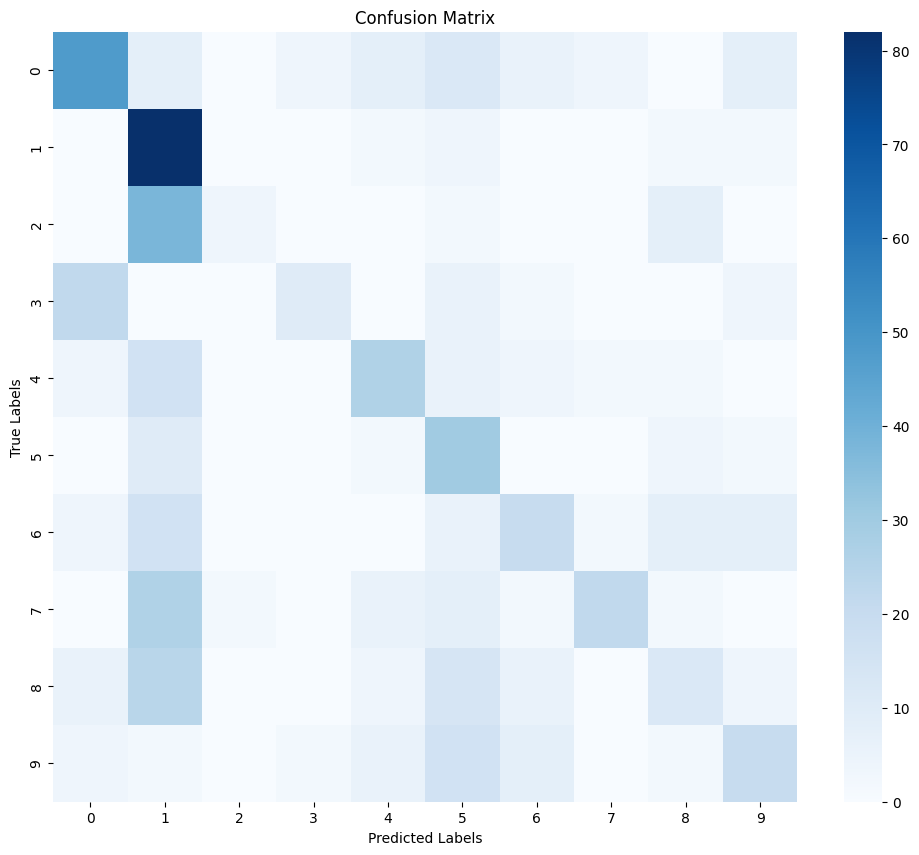

In [68]:
cm = confusion_matrix(y_val_encoded, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()